 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')

# Read the Whale Returns CSV with index as date and infer date / time format from the data
whale_returns_df = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True, infer_datetime_format = True)

# Sort Index as best practice from lowest date to highest date
whale_returns_df.sort_index()

#Display first 5 records to validate
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#Validate the number of records
whale_returns_df.shape

(1060, 4)

In [4]:
#Validate the data types
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls

# The row which has any of the column as null will be removed and doing it in place
whale_returns_df.dropna(axis='index', how='any', inplace=True)

# Verify if the nulls are removed
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
#Recheck the shape, it should be 1 row less
whale_returns_df.shape

(1059, 4)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algorithmic_returns_path = Path('Resources/algo_returns.csv')

# Read the Algorithmic Returns CSV with index as date and infer date / time format from the data
algorithmic_returns_df = pd.read_csv(algorithmic_returns_path, index_col='Date', parse_dates=True, infer_datetime_format = True)

# Sort Index as best practice from lowest date to highest date
algorithmic_returns_df.sort_index()

#Display first 5 records to validate
algorithmic_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
#Validate the number of records
algorithmic_returns_df.shape

(1241, 2)

In [10]:
#Validate the data types
algorithmic_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
# Count nulls
algorithmic_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls

# The row which has any of the column as null will be removed and doing it in place
algorithmic_returns_df.dropna(axis='index', how='any', inplace=True)

# Verify if the nulls are removed
algorithmic_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [13]:
#Recheck the shape, it should be 6 rows less
algorithmic_returns_df.shape

(1235, 2)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P TSX 60 Closing Prices
sp_closing_path = Path('Resources/sp_tsx_history.csv')

# Read the Algorithmic Returns CSV with index as date and infer date / time format from the data
sp_closing_df = pd.read_csv(sp_closing_path, index_col='Date', parse_dates=True, infer_datetime_format = True)

# Sort Index as best practice from lowest date to highest date
sp_closing_df.sort_index()

#Display first 5 records to validate
sp_closing_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [15]:
# Check Data Types
sp_closing_df.dtypes


Close    object
dtype: object

In [16]:
# Fix Data Types
#Replace $ symbol in the close prices
sp_closing_df['Close'] = sp_closing_df['Close'].str.replace('$', '', regex=True)
#Replace , in the close prices
sp_closing_df['Close'] = sp_closing_df['Close'].str.replace(',', '', regex=True)
sp_closing_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [17]:
#Recheck the data types
sp_closing_df.dtypes

Close    object
dtype: object

In [18]:
#Update the data type
sp_closing_df['Close'] = sp_closing_df['Close'].astype('float64')
sp_closing_df.dtypes

Close    float64
dtype: object

In [19]:
# Calculate Daily Returns
sp_returns_df = sp_closing_df.pct_change()
sp_returns_df


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [20]:
#Check for nulls
sp_returns_df.isnull().sum()


Close    1
dtype: int64

In [21]:
# Drop nulls
sp_returns_df.dropna(axis='index', how='any', inplace=True)

#Verify no nulls
sp_returns_df.isnull().sum()

Close    0
dtype: int64

In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df.columns = ['S&P 60 TSX']
sp_returns_df

,S&P 60 TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns_df = pd.concat([whale_returns_df, algorithmic_returns_df, sp_returns_df], axis='columns', join='inner')
all_daily_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60 TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for all portfolios'}, xlabel='Date'>

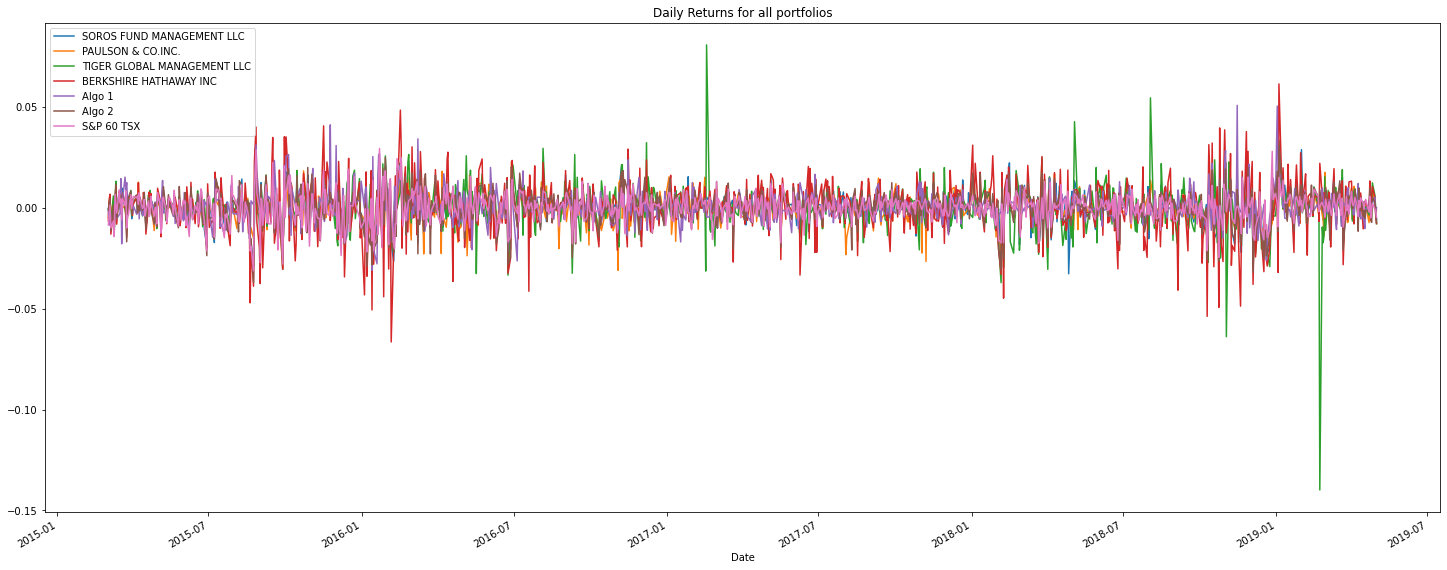

In [24]:
# Plot daily returns of all portfolios
all_daily_returns_df.plot(figsize=(25,10), title="Daily Returns for all portfolios")

#### Calculate and Plot cumulative returns.

In [25]:
# Calculate cumulative returns of all portfolios

cumulative_returns_df = (1 + all_daily_returns_df).cumprod()
cumulative_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60 TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

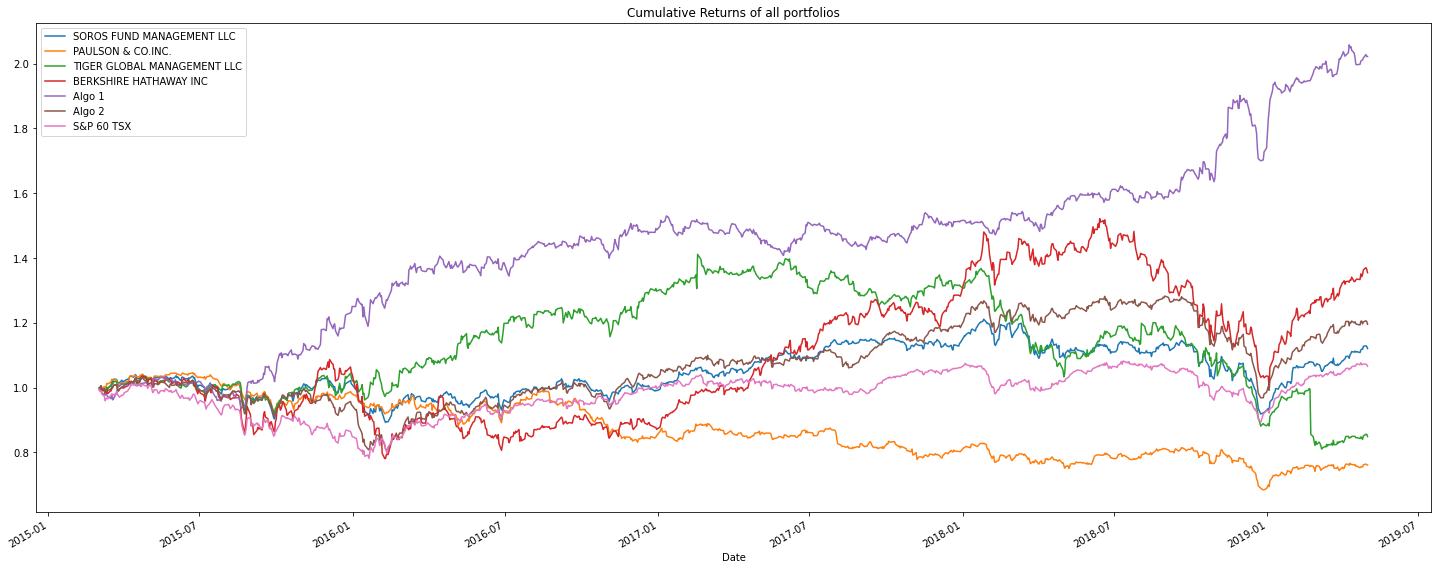

In [26]:
# Plot cumulative returns
cumulative_returns_df.plot(figsize=(25,10), title="Cumulative Returns of all portfolios" )

## Portfolios that outperforms S&P TSX

- ALGO 1
- BERKSHIRE HATHAWAY INC
- ALGO 2
- SOROS FUND MANAGEMENT LLC

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

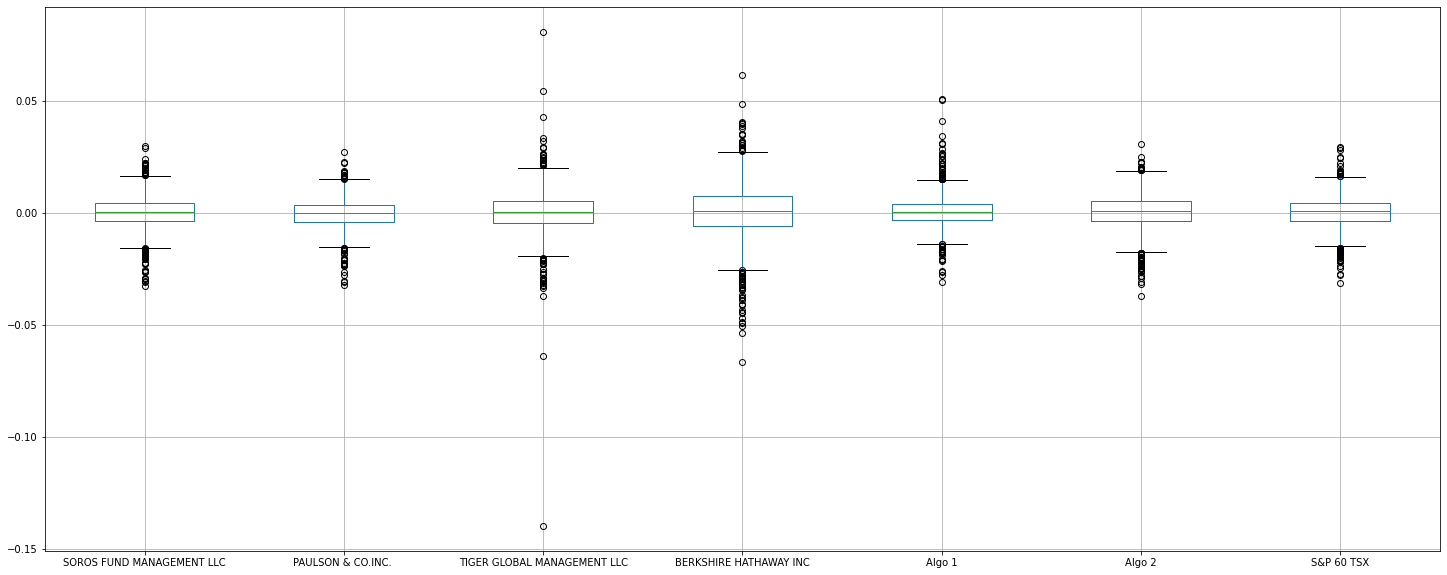

In [27]:
# Box plot to visually show risk
all_daily_returns_df.boxplot(figsize=(25,10))

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
daily_returns_std = all_daily_returns_df.std()
daily_returns_std.sort_values(ascending=False, inplace=True)
daily_returns_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P 60 TSX                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [29]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_daily_returns_std = daily_returns_std["S&P 60 TSX"]
sptsx_daily_returns_std

0.007034167748577725

In [30]:
# Determine which portfolios are riskier than the S&P TSX 60
#If standard deviation greater than S&P TSX 60, then it is more riskier
daily_returns_std[daily_returns_std > sptsx_daily_returns_std]

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64

<AxesSubplot:title={'center':'Portfolios riskier than S&P 60 TSX'}>

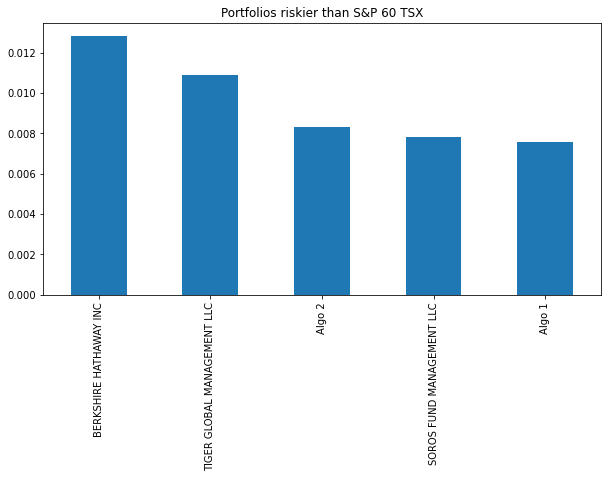

In [31]:
daily_returns_std[daily_returns_std > sptsx_daily_returns_std].plot(kind="bar", title="Portfolios riskier than S&P 60 TSX",  figsize=(10,5) )

## Portfolios that are riskier than S&P TSX 60

- BERKSHIRE HATHAWAY INC
- TIGER GLOBAL MANAGEMENT LLC
- Algo 2
- SOROS FUND MANAGEMENT LLC
- Algo 1 


### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_returns_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

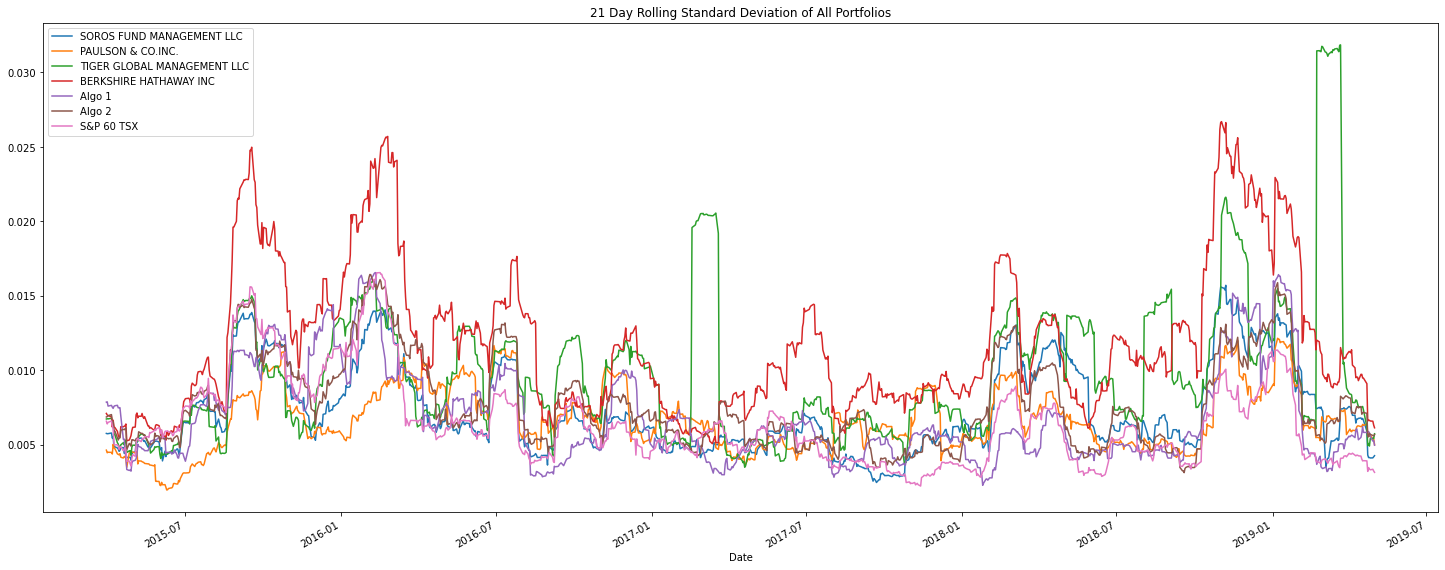

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns_rolling_std = all_daily_returns_df.rolling(window=21).std() 
# Plot the rolling standard deviation
daily_returns_rolling_std.plot(figsize=(25,10), title="21 Day Rolling Standard Deviation of All Portfolios")

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
correlation = all_daily_returns_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60 TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P 60 TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

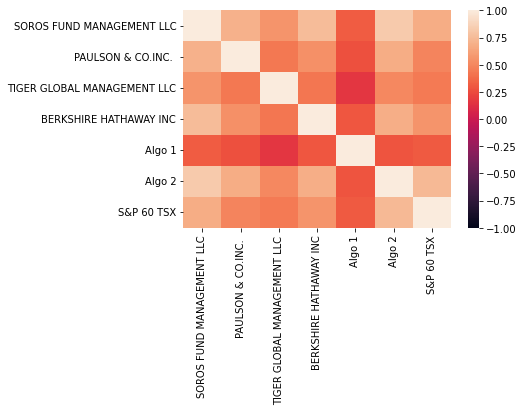

In [35]:
#Plot the correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

## Three Portfolios that correlates most to S&P 60 TSX
- Algo 2
- SOROS FUND MANAGEMENT LLC
- BERKSHIRE HATHAWAY INC

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [36]:
# Calculate variance of S&P TSX
variance = all_daily_returns_df['S&P 60 TSX'].var()
# Calculate covariance of a single portfolio
#Portfolio chosen is SOROS FUND MANAGEMENT LLC and we will calculate covariance of SOROS FUND MANAGEMENT LLC vs S&P 60 TSX
covariance = all_daily_returns_df['SOROS FUND MANAGEMENT LLC'].cov(all_daily_returns_df['S&P 60 TSX'])

# Computing beta
soros_fund_beta = covariance / variance
soros_fund_beta

0.7499446668435332

### Calculate and Plot 60 Day Rolling Beta

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

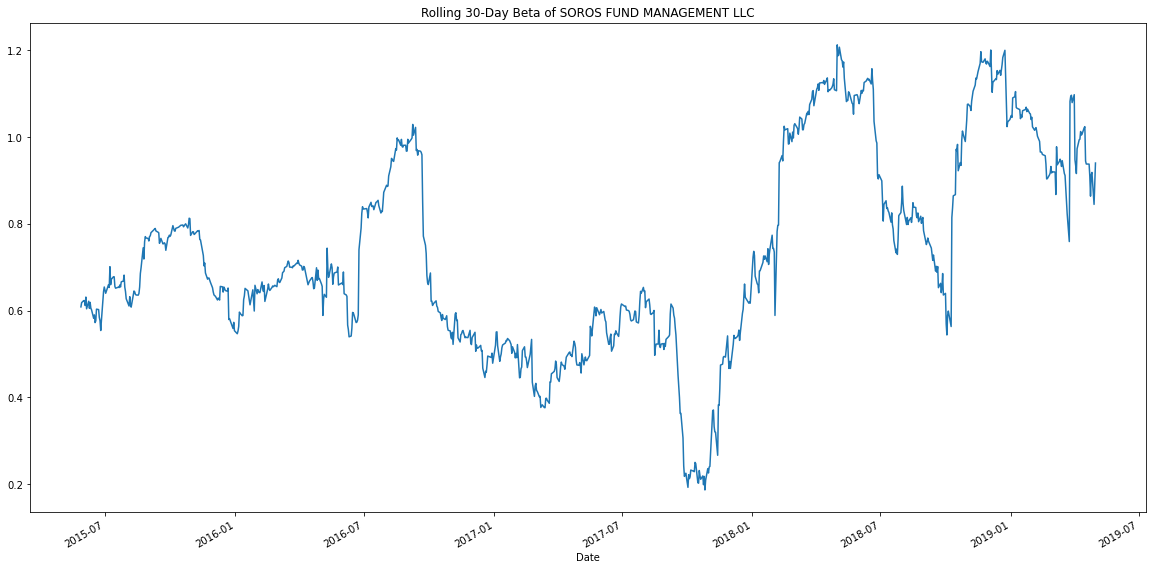

In [37]:
# Calculate 60-day rolling covariance of SOROS FUND MANAGEMENT LLC vs. S&P 60 TSX and plot the data
rolling_covariance = all_daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_daily_returns_df['S&P 60 TSX'])
rolling_variance = all_daily_returns_df['S&P 60 TSX'].rolling(window=60).var()

# Calculate 60-day rolling beta of SOROS FUND MANAGEMENT LLC and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'EWM with half life of 21 days for all portfolios'}>

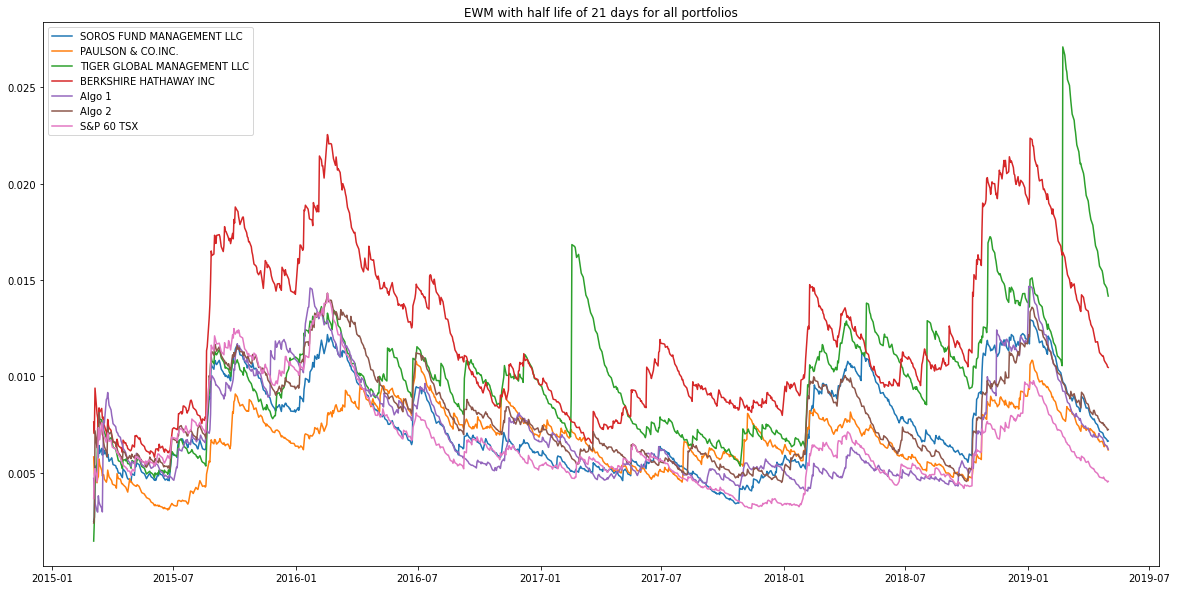

In [70]:
# Use `ewm` to calculate the rolling window
rolling_ewm = all_daily_returns_df.ewm(halflife=21).std()
rolling_ewm.plot(figsize=(20, 10), title='EWM with half life of 21 days for all portfolios')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Calculate Annualized Sharpe Ratios with assuming 252 trading days in the year
sharpe_ratios = (all_daily_returns_df.mean() * 252) / (all_daily_returns_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False, inplace=True)
sharpe_ratios

Algo 1                         1.491514
BERKSHIRE HATHAWAY INC         0.467045
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
S&P 60 TSX                     0.195550
TIGER GLOBAL MANAGEMENT LLC   -0.144455
PAULSON & CO.INC.             -0.547594
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all portfolios'}>

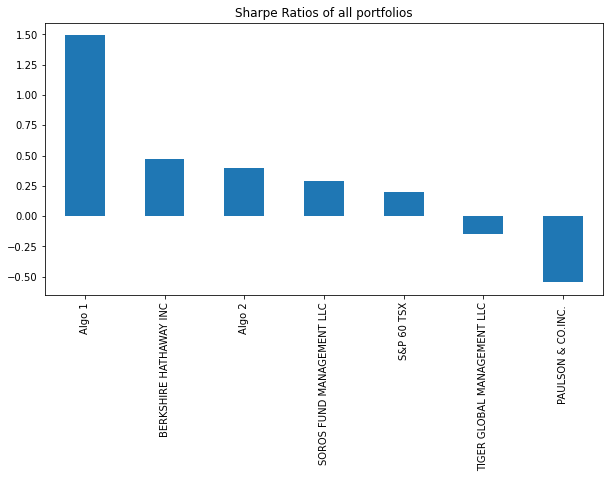

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of all portfolios", figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

- Algo 1 outperform both the market and the whale portfolio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

## Using Google Finance Function in Google Sheets

  ![returns-dataframe.png](Images/GoogleFinance.jpg)

In [41]:
# Reading data from 1st stock - ASX : BHP - BHP Billiton
bhp_csv_gsheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTQ25gFy_nDc1k5GLPhI5ZbGtky0eFl9_5vtGon_2Nsu5yeWJ7qVR3hIj28VSGnPMyfY2IePSrZTOtz/pub?gid=0&single=true&output=csv'
bhp_close_df = pd.read_csv(bhp_csv_gsheet_url, index_col='Date',infer_datetime_format=True, parse_dates=True)
bhp_close_df

,Close
Date,
2012-10-02 16:00:00,31.34
2012-10-03 16:00:00,31.24
2012-10-04 16:00:00,30.83
2012-10-05 16:00:00,31.14
2012-10-08 16:00:00,31.07
...,...
2019-12-20 16:00:00,39.72
2019-12-23 16:00:00,39.22
2019-12-24 14:10:00,39.23


In [42]:
#The index has time also and our S&P does not have time, so we will update the index to only include date and not time
bhp_close_df.index = bhp_close_df.index.date
bhp_close_df

,Close
2012-10-02,31.34
2012-10-03,31.24
2012-10-04,30.83
2012-10-05,31.14
2012-10-08,31.07
...,...
2019-12-20,39.72
2019-12-23,39.22
2019-12-24,39.23
2019-12-27,39.64


In [43]:
# Reading data from 2nd Stock - ASX:WOW - Woolworths
wow_csv_gsheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSWntPN3n7JIZhVetV8nX4g99CK6dyBKUs2CCx7JfpqXEUU0Qf5RGczmjCS8r49OdMHqjRK_u-rVFtl/pub?gid=0&single=true&output=csv'
wow_close_df = pd.read_csv(wow_csv_gsheet_url, index_col='Date',infer_datetime_format=True, parse_dates=True)
#The index has time also and our S&P does not have time, so we will update the index to only include date and not time
wow_close_df.index = wow_close_df.index.date
wow_close_df

,Close
2012-10-02,24.33
2012-10-03,24.25
2012-10-04,24.54
2012-10-05,24.86
2012-10-08,24.96
...,...
2019-12-20,31.55
2019-12-23,31.82
2019-12-24,31.66
2019-12-27,31.69


In [44]:
# Reading data from 3rd stock - ASX:TLS - Telstra

tls_csv_gsheet_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQT7e9R9S4cYfkwvWUGfY55MbZJLOAWp9WFrUIEFN6fCDt1L8-iyXsHfeoe7cabBbvb7ouK1m9oQOsv/pub?gid=0&single=true&output=csv'
tls_close_df = pd.read_csv(tls_csv_gsheet_url, index_col='Date',infer_datetime_format=True, parse_dates=True)
#The index has time also and our S&P does not have time, so we will update the index to only include date and not time
tls_close_df.index = tls_close_df.index.date
tls_close_df

,Close
2012-10-02,3.92
2012-10-03,3.94
2012-10-04,3.93
2012-10-05,3.95
2012-10-08,3.95
...,...
2019-12-20,3.68
2019-12-23,3.67
2019-12-24,3.65
2019-12-27,3.66


In [45]:
# Combine all stocks in a single DataFrame
my_portolio_df = pd.concat([bhp_close_df, wow_close_df, tls_close_df], axis="columns", join="inner")  
my_portolio_df

,Close,Close,Close
2012-10-02,31.34,24.33,3.92
2012-10-03,31.24,24.25,3.94
2012-10-04,30.83,24.54,3.93
2012-10-05,31.14,24.86,3.95
2012-10-08,31.07,24.96,3.95
...,...,...,...
2019-12-20,39.72,31.55,3.68
2019-12-23,39.22,31.82,3.67
2019-12-24,39.23,31.66,3.65
2019-12-27,39.64,31.69,3.66


In [46]:
# Reset Date index
my_portolio_df.sort_index()

,Close,Close,Close
2012-10-02,31.34,24.33,3.92
2012-10-03,31.24,24.25,3.94
2012-10-04,30.83,24.54,3.93
2012-10-05,31.14,24.86,3.95
2012-10-08,31.07,24.96,3.95
...,...,...,...
2019-12-20,39.72,31.55,3.68
2019-12-23,39.22,31.82,3.67
2019-12-24,39.23,31.66,3.65
2019-12-27,39.64,31.69,3.66


In [47]:
# Reorganize portfolio data by having a column per symbol
my_portolio_df.columns = ['BHP', 'WOW', 'TLS']
my_portolio_df

,BHP,WOW,TLS
2012-10-02,31.34,24.33,3.92
2012-10-03,31.24,24.25,3.94
2012-10-04,30.83,24.54,3.93
2012-10-05,31.14,24.86,3.95
2012-10-08,31.07,24.96,3.95
...,...,...,...
2019-12-20,39.72,31.55,3.68
2019-12-23,39.22,31.82,3.67
2019-12-24,39.23,31.66,3.65
2019-12-27,39.64,31.69,3.66


In [48]:
# Calculate daily returns
my_portolio_daily_returns = my_portolio_df.pct_change()

# Drop NAs
my_portolio_daily_returns.dropna(axis='index', how='any', inplace=True)

# Verify if the nulls are removed
my_portolio_daily_returns.isnull().sum()

BHP    0
WOW    0
TLS    0
dtype: int64

In [49]:
# Display sample data
my_portolio_daily_returns.head()

,BHP,WOW,TLS
2012-10-03,-0.003191,-0.003288,0.005102
2012-10-04,-0.013124,0.011959,-0.002538
2012-10-05,0.010055,0.013040,0.005089
2012-10-08,-0.002248,0.004023,0.000000
2012-10-09,0.006759,-0.008413,-0.002532


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Set weights
weights = [1/3, 1/3, 1/3] # 1/3 for BHP index 0, 1/3 for WOW index 1, 1/3 for TLS index 2

# Calculate portfolio return using the dot function
portfolio_returns = my_portolio_daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()


2012-10-03   -0.000459
2012-10-04   -0.001235
2012-10-05    0.009395
2012-10-08    0.000592
2012-10-09   -0.001395
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Join your returns DataFrame to the original returns DataFrame
#Create the dataframe from custom portfolio weighted returns 
my_portfolio_weighted_returns = pd.DataFrame(portfolio_returns, columns=['My Portfolio'])
my_portfolio_weighted_returns

,My Portfolio
2012-10-03,-0.000459
2012-10-04,-0.001235
2012-10-05,0.009395
2012-10-08,0.000592
2012-10-09,-0.001395
...,...
2019-12-20,-0.006690
2019-12-23,-0.002249
2019-12-24,-0.003408
2019-12-27,0.004713


In [55]:
all_daily_returns_df.index = all_daily_returns_df.index.date

In [56]:
#Join the portfolio to all portfolio data frame
consolidated_returns_df = pd.concat([all_daily_returns_df,my_portfolio_weighted_returns ], axis="columns", join="inner")
consolidated_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60 TSX,My Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001677
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.010647
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.003998
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.004742
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.015338
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.000744
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.005729
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.001991
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,-0.000228


In [58]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
consolidated_returns_df.dropna(axis='index', how='any', inplace=True)
consolidated_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60 TSX,My Portfolio
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001677
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.010647
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.003998
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.004742
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.015338
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.000744
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.005729
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.001991
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,-0.000228


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized `std`

# Calculate the daily standard deviations of all portfolios
consolidated_daily_returns_std = consolidated_returns_df.std()
consolidated_daily_returns_std.sort_values(ascending=False, inplace=True)
# Calculate the annualized standard deviation (252 trading days)
consolidated_annualized_std = consolidated_daily_returns_std * np.sqrt(252)
consolidated_annualized_std.head()

BERKSHIRE HATHAWAY INC         0.204376
TIGER GLOBAL MANAGEMENT LLC    0.172756
My Portfolio                   0.166529
Algo 2                         0.132268
SOROS FUND MANAGEMENT LLC      0.123864
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of All Portfolios'}>

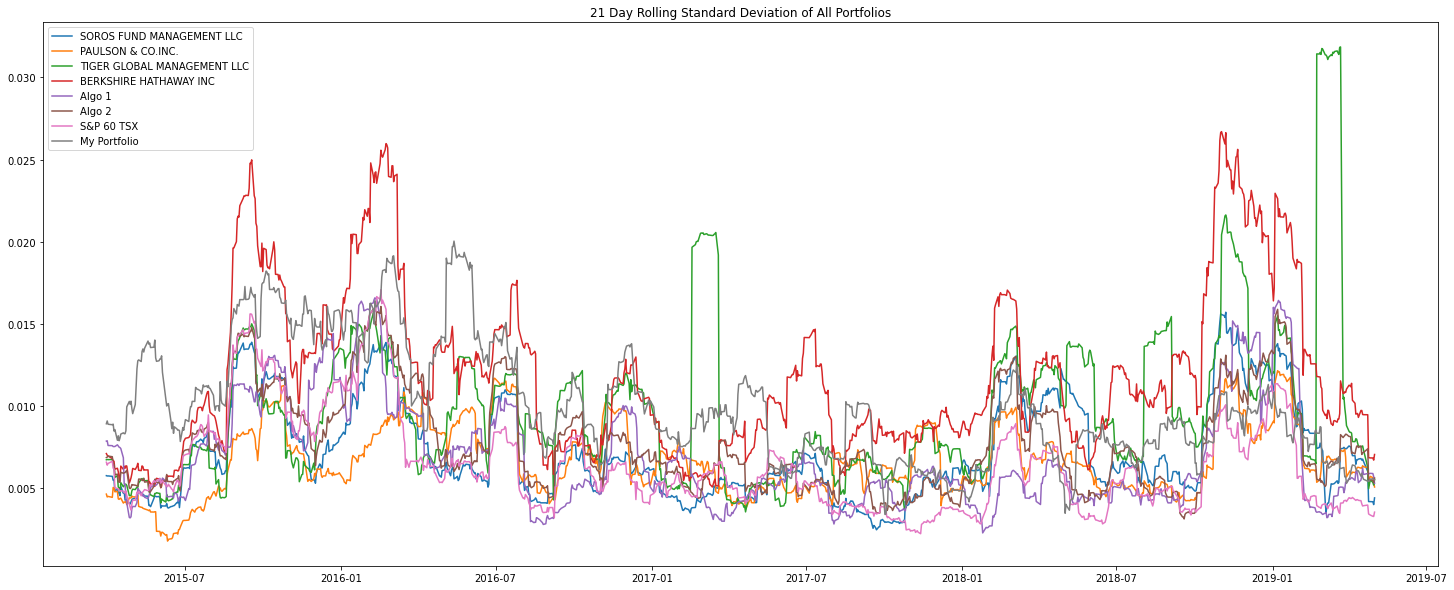

In [61]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
consolidated_daily_returns_rolling_std = consolidated_returns_df.rolling(window=21).std() 
# Plot the rolling standard deviation
consolidated_daily_returns_rolling_std.plot(figsize=(25,10), title="21 Day Rolling Standard Deviation of All Portfolios")



### Calculate and plot the correlation

In [64]:
# Calculate and plot the correlation

consolidated_correlation = consolidated_returns_df.corr()
# Display de correlation matrix
consolidated_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 60 TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.698396,0.558250,0.751798,0.313189,0.826803,0.671535,0.129816
PAULSON & CO.INC.,0.698396,1.000000,0.432979,0.540044,0.268320,0.673671,0.483187,0.096489
TIGER GLOBAL MANAGEMENT LLC,0.558250,0.432979,1.000000,0.425217,0.156170,0.504842,0.437876,0.041668
BERKSHIRE HATHAWAY INC,0.751798,0.540044,0.425217,1.000000,0.290590,0.686211,0.558290,0.121553
Algo 1,0.313189,0.268320,0.156170,0.290590,1.000000,0.283236,0.310431,0.071826
Algo 2,0.826803,0.673671,0.504842,0.686211,0.283236,1.000000,0.736249,0.161561
S&P 60 TSX,0.671535,0.483187,0.437876,0.558290,0.310431,0.736249,1.000000,0.229775
My Portfolio,0.129816,0.096489,0.041668,0.121553,0.071826,0.161561,0.229775,1.000000


<AxesSubplot:>

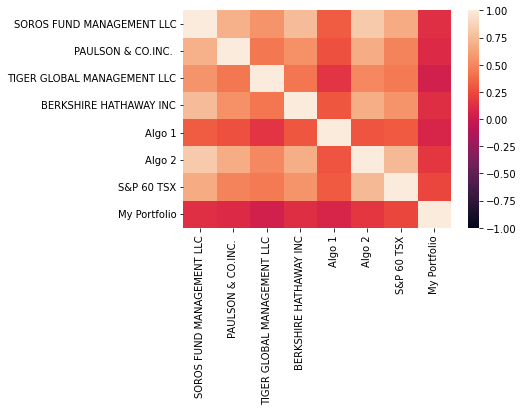

In [65]:
#Plot the correlation
sns.heatmap(consolidated_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 30-Day Beta of My Portfolio'}>

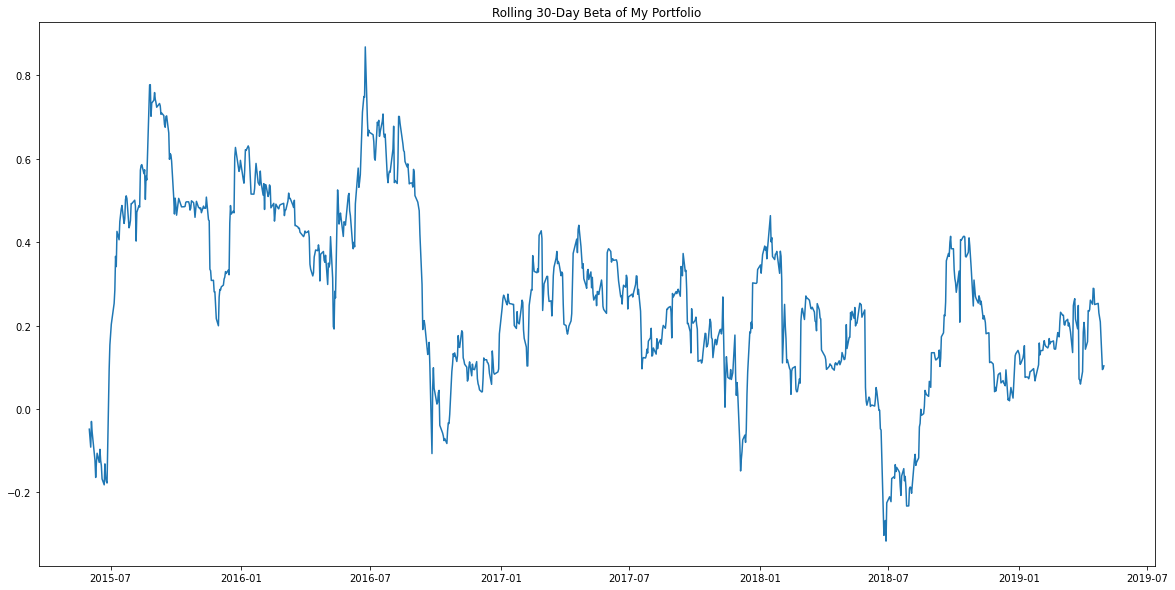

In [66]:
# Calculate and plot Beta

# Calculate 60-day rolling covariance of My Portfolio vs. S&P 60 TSX and plot the data
rolling_consolidated_covariance = consolidated_returns_df['My Portfolio'].rolling(window=60).cov(consolidated_returns_df['S&P 60 TSX'])
rolling_consolidated_variance = consolidated_returns_df['S&P 60 TSX'].rolling(window=60).var()

# Calculate 60-day rolling beta of My Portfolio and plot the data
rolling_consolidated_beta = rolling_consolidated_covariance / rolling_consolidated_variance
rolling_consolidated_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Calculate Annualized Sharpe Ratios with assuming 252 trading days in the year
consolidated_sharpe_ratios = (consolidated_returns_df.mean() * 252) / (consolidated_returns_df.std() * np.sqrt(252))
consolidated_sharpe_ratios.sort_values(ascending=False, inplace=True)
consolidated_sharpe_ratios

Algo 1                         1.508912
BERKSHIRE HATHAWAY INC         0.503978
Algo 2                         0.445410
SOROS FUND MANAGEMENT LLC      0.316918
S&P 60 TSX                     0.241705
My Portfolio                  -0.069393
TIGER GLOBAL MANAGEMENT LLC   -0.149978
PAULSON & CO.INC.             -0.403108
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all portfolios'}>

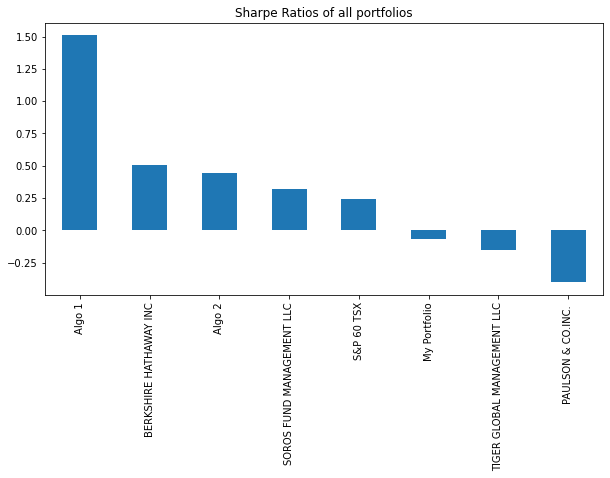

In [68]:
# Visualize the sharpe ratios as a bar plot
consolidated_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of all portfolios", figsize=(10,5))

### How does your portfolio do?

Write your answer here!

- My Portfolio didn't fare better than S&P 60 TSX and most other whale portfolios. It was however better than TIGER GLOBAL MANAGEMENT LLC and PAULSON & CO INC.